**The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.**
**Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.**

Play store is a marketplace (App) for downloading Android applications for smartphones. Smartphones sells soaring across world. Its very lucrative market for App developers as users are looking for comfort and their needs increaseing like entertainment, games etc. It's important to find out what type of apps people downlaoding before developing an App for users and list that APP on Play Store for downlaoding.

**What is a EDA?**
Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

**What is need of an EDA?**
"The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables".

Steps involved in this Play Store App and User reviews EDA.
1. Loading the Datasets for analysis.
2. Cleaning the data like removing duplicates, filling missing values, changing data types accordingly and merging both datasets for sentiment analysis.
3. Questions that can be asked on cleaned data.
4. Data Visualizations.
5. Conclusion from exploratory data analysis.






In [419]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [420]:
# Import Required Packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Datset's Loading**

In [421]:
# Loading the file path and datasets for analysis.
data_path = '/content/drive/MyDrive/Play_Store_App_EDA_Saurabh/Play_Store_Data.csv'
reviews_path = '/content/drive/MyDrive/Play_Store_App_EDA_Saurabh/User_Reviews.csv'
psa_data_df = pd.read_csv(data_path)
reviews_df = pd.read_csv(reviews_path)

### **Datasets Exploration.**
1. Play Store App Data.
2. User Reviews.



In [422]:
# The shape represents number of (rows,column). Here psa_df means play store data dataframe.
print(f'The shape of psa_data_df is {psa_data_df.shape}.') 

The shape of psa_data_df is (10841, 13).


In [423]:
# Let's see the first n rows of psa_df
psa_data_df.head(5) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Columns Description : Play Store App Data.**
1. App : It contains name of an App.
2. Category : This column contains category of an Apps.
3. Rating : This column contains Rating of an App.
4. Reviews : This column has total number of reviews of an App.
5. Size : The size of the App.
6. Install : The number of installs of the App.
7. Type : The type of the app (Free/Paid).
8. Price : The price of an App.
9. Content Rating: The content rating for age groups.
10. Genres: The genre of an App
11. Last Updated: The date when the app was last updated.
12. Current Ver: The current version of an App.
13. Android Ver: The minimum Android version required to run an App.





In [424]:
# Let's see the last n rows of psa_df
psa_data_df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [425]:
# Information about the dataset.
# psa_data_df.info()
print(f'The below dataframe tell us about the data type, unique values, missing count(NaN) from each column.')
print('\n')
def psa_df():
  temp = pd.DataFrame(index =psa_data_df.columns)
  temp['Data_Type'] = psa_data_df.dtypes
  temp['Unique_Count'] = psa_data_df.nunique()
  temp['Count']= psa_data_df.isnull().count()
  temp['Missing_Count'] = psa_data_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_Count'] / temp['Count'] * 100, 2) 
  return temp
psa_df()

The below dataframe tell us about the data type, unique values, missing count(NaN) from each column.




,Data_Type,Unique_Count,Count,Missing_Count,Missing_percentage
App,object,9660,10841,0,0.00
Category,object,34,10841,0,0.00
Rating,float64,40,10841,1474,13.60
Reviews,object,6002,10841,0,0.00
Size,object,462,10841,0,0.00
Installs,object,22,10841,0,0.00
Type,object,3,10841,1,0.01
Price,object,93,10841,0,0.00
Content Rating,object,6,10841,1,0.01
Genres,object,120,10841,0,0.00


1. **Rating** has total **1474** null values which contributes **13.60%** of the values.
2. **Type** has 1 null value which contributes **0.01%** of the total entries.
3. **Content_Rating** has 1 null value which contributes **0.01%** of the total entries.
4. **Current_Ver** has 8 null values which contributes **0.07%** of the total entries.
5. **Android_Ver** has 3 null values which contributes **0.03%** of the total entries.
6. Only **Rating** column has more than **10%** missing values.

**User Reviews Data Exploration**

In [426]:
#Shape represents number of (rows,column).
print(f'The shape of reviews_df is {reviews_df.shape}.')

The shape of reviews_df is (64295, 5).


In [427]:
# First n rows of reviews_df.
reviews_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Column Description: User Reviews Dataset**

1. App : This column contains the name of an App.
2. Translated_Review : This column contains written user reviews.
3. Sentiment : This column contains Sentiment of an App.
4. Sentiment Polarity: Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.
5. Sentiment Subjectivity : It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings.



In [428]:
# Last n rows of reviews_df.
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [429]:
# reviews_df.info().
print(f'The below dataframe tell us about the data type, unique values, missing count(NaN) from each column.')
print('\n')
def ur_df():
  temp = pd.DataFrame(index = reviews_df.columns)
  temp['Data_type'] = reviews_df.dtypes
  temp['Unique_count'] = reviews_df.nunique()
  temp['Count']= reviews_df.isnull().count()
  temp['Missing_values_count'] = reviews_df.isnull().sum()
  temp['Missing_percentage']= round( temp['Missing_values_count'] / temp['Count'] * 100, 2) 
  return temp
ur_df()

The below dataframe tell us about the data type, unique values, missing count(NaN) from each column.




,Data_type,Unique_count,Count,Missing_values_count,Missing_percentage
App,object,1074,64295,0,0.00
Translated_Review,object,27994,64295,26868,41.79
Sentiment,object,3,64295,26863,41.78
Sentiment_Polarity,float64,5410,64295,26863,41.78
Sentiment_Subjectivity,float64,4474,64295,26863,41.78


### **Data wrangling on Play Store App dataset.**
1. Creating a copy of original dataset.
2. Finding duplicated apps and dropping duplicated apps from app column.
3. Keeping only required columns for analysis.
4. Checking Nan values and replcaing with required value.
5. Removing special characters from values.
6. Changing data types of columns.






In [430]:
# Creating a copy of  Play Store App data dataset. 
ps_data_df = psa_data_df.copy() 
ps_data_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [431]:
# Let's see the column names from Play Store App dataset.
ps_data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [432]:
# Dropping three columns Current Ver and Android Ver.
ps_data_df = ps_data_df.drop(['Last Updated','Current Ver', 'Android Ver'], axis = 1)

In [433]:
# Replacing spaces in column name with underscore for more ease to acces columns.
ps_data_df.columns = ps_data_df.columns.str.replace(' ', '_')

In [434]:
# Checking unique values in Category Column.
ps_data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [435]:
# Let's see why is there only one numercial entry in category column.
ps_data_df[ps_data_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [436]:
# Dropped category 1.9 due to inconsistency data and one row wont affect the outuput.
ps_data_df = ps_data_df.drop(index = 10472)

In [437]:
# Sorting dataframe alphabetically using Category column.
ps_data_df.sort_values(by='Category')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,Art & Design
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11M,"10,000+",Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather
3639,Yahoo Weather,WEATHER,4.4,1312037,Varies with device,"10,000,000+",Free,0,Everyone,Weather
3638,Klara weather,WEATHER,4.6,36900,4.8M,"500,000+",Free,0,Everyone,Weather
4133,Weather Live,WEATHER,4.5,76593,Varies with device,"500,000+",Paid,$5.99,Everyone,Weather


In [438]:
# There are 10840 rows in a dataframe. Checking duplicated rows by taking only unique app and its last entry.
ps_data_df[ps_data_df.duplicated(subset='App', keep='last')] #Keeping last record 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference
...,...,...,...,...,...,...,...,...,...,...
3825,Transit: Real-Time Transit App,MAPS_AND_NAVIGATION,4.2,43269,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation
3826,Mapy.cz - Cycling & Hiking offline maps,MAPS_AND_NAVIGATION,4.5,56443,43M,"1,000,000+",Free,0,Everyone,Maps & Navigation
3827,Uber,MAPS_AND_NAVIGATION,4.2,4928420,Varies with device,"100,000,000+",Free,0,Everyone,Maps & Navigation
3865,Moovit: Bus Time & Train Time Live Info,MAPS_AND_NAVIGATION,4.4,617477,Varies with device,"10,000,000+",Free,0,Everyone,Maps & Navigation


*   **App** column has **1181** duplicated apps.

In [439]:
# Dropped duplicated apps from dataframe and keeping only last record.
ps_data_df = ps_data_df.drop_duplicates(subset='App', keep = 'last')

In [440]:
# New shape of Play Store App data having 9659 rows and 10 columns.
rows = ps_data_df.shape[0]
columns = ps_data_df.shape[1]
print(f'The number of rows in Play Store dataframe after removing duplicate App names are {rows}.') 
print(f'The number of columns in Play Store dataframe after keeping only required columns for EDA are {columns}.') 

The number of rows in Play Store dataframe after removing duplicate App names are 9659.
The number of columns in Play Store dataframe after keeping only required columns for EDA are 10.


In [441]:
# Null values from each column.
ps_data_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [442]:
# App column unique count of Apps.
app_unique_count = ps_data_df['App'].nunique()
print(f'Total unique app names in App column {app_unique_count}.')

Total unique app names in App column 9659.


In [443]:
# Category unique count.
catergory_unique_count = ps_data_df['Category'].nunique()
print(f'The total unique categories are {catergory_unique_count}.')

The total unique categories are 33.


In [444]:
# Category Column unique value count.
ps_data_df['Category'].value_counts()

FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
ENTERTAINMENT            79
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [445]:
# Rating Column unique values.
ps_data_df['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, nan, 3.3, 3.4, 3.5, 3.1, 5. , 2.5, 3. , 1. , 1.9, 2.7,
       2.8, 2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [446]:
# Descriptive summary of a Rating column.
ps_data_df['Rating'].describe()

count    8196.000000
mean        4.173219
std         0.536269
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [447]:
# Checking median rating of rating column.
rating_median = ps_data_df['Rating'].median()
print(f'The median of of Rating column is {rating_median}.')

The median of of Rating column is 4.3.


In [448]:
# Filled NaN values in rating column.
ps_data_df.loc[ps_data_df['Rating'].isnull(), 'Rating'] = ps_data_df['Rating'].fillna(rating_median)

In [449]:
# Converted Reviews column dtype to int.
ps_data_df["Reviews"] = pd.to_numeric(ps_data_df["Reviews"])

In [450]:
# Size column.
ps_data_df['Size'].unique() #Unique values in Size

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '51M', '48M', '8.5M', '41M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [451]:
# Replaced 'Varies with device' size with 'NaN'.
ps_data_df['Size'] =  ps_data_df['Size'].replace('Varies with device', 'NaN', regex=True) 

In [452]:
# Keeping apps with MB as it is and converting KB into MB.
size =[]

for i in ps_data_df['Size']:
    if i == 'NaN':
        size.append('NaN')
    elif i[-1] == 'k':
        size.append(float(i[:-1])/1000)
    else:
        size.append(float(i[:-1]))

In [453]:
# Size column data type changed.
ps_data_df['Size'] = size 
ps_data_df['Size'] = ps_data_df['Size'].astype(float)

In [454]:
ps_data_df['Size'].describe()

count    8432.000000
mean       20.397970
std        21.828171
min         0.008500
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

In [455]:
# The median app size column.
size_median = ps_data_df['Size'].median()
print(size_median)

12.0


In [456]:
# NaN values filled with median of Size column.
ps_data_df.loc[ps_data_df['Size'].isnull(), 'Size'] = ps_data_df['Size'].fillna(size_median) 

In [457]:
# Installs column unique entries.
ps_data_df['Installs'].unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '500,000,000+', '0+', '0'], dtype=object)

In [458]:
# Convert Installs to numeric and remove special characters.
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_data_df['Installs'] = ps_data_df['Installs'].apply(lambda x : float(x))

In [459]:
# Type
ps_data_df[ps_data_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
9148,Command & Conquer: Rivals,FAMILY,4.3,0,12.0,0.0,NaN,0,Everyone 10+,Strategy


In [460]:
# In family category only Command & Conquer: Rivals app has NaN in its Type column.
df_groupby_category = ps_data_df.groupby('Category')

In [461]:
# The number of Free and Paid apps in Family category.
df_family = df_groupby_category.get_group('FAMILY')
df_family['Type'].value_counts()

Free    1720
Paid     185
Name: Type, dtype: int64

In [462]:
# NaN value in Type column filled with as Most number of apps are Free.
ps_data_df['Type'] = ps_data_df['Type'].fillna('Free')

In [463]:
# Now, we have only two unique types in Type column.
ps_data_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [464]:
# Checking unique values in Price.
ps_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$1.49', '$2.99', '$7.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$10.00',
       '$16.99', '$11.99', '$29.99', '$74.99', '$5.49', '$33.99',
       '$24.99', '$39.99', '$19.99', '$4.49', '$1.70', '$8.99', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59', '$6.49',
       '$1.29', '$5.00', '$13.99', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$3.95', '$154.99', '$3.08', '$2.59', '$4.80',
       '$1.96', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04', '$12.99',
       '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90',
       '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [465]:
# Converting Price into numerical values and replacing $.
ps_data_df['Price'] = ps_data_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_data_df['Price'] = ps_data_df['Price'].apply(lambda x : float(x))

In [466]:
#Price column description #51
ps_data_df['Price'].describe()

count    9659.000000
mean        1.097231
std        16.851618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [467]:
# Checking unique Values.
ps_data_df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [468]:
# Here we checking the unique values in Genres.
ps_data_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Comics;Creativity', 'Communication', 'Dating', 'Education',
       'Education;Creativity', 'Education;Education',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Puzzle', 'Racing',
       'Sports', 'Casual', 'Arcade', 'Trivia', 'Simulation', 'Action',
       'Word', 'Role Playing', 'Strategy', 'Board',
       'Simulation;Education', 'Adventure', 'Card',
       'Action;Action & Adventure', 'Music', 'Casual;Brain Games',
       'Educational;Creativity', 'Puzzle;Brain Games',
       'Educational;Education', 'Card;Brain Games', 'Casual;Pretend Play',
       'Educational;Brain Games', 

In [469]:
# Geners count
geners_df = ps_data_df['Genres'].value_counts().sort_values(ascending=False).reset_index().head(30)
geners_df.rename({'index': 'Genres', 'Genres': 'Total_Count'}, axis=1, inplace=True)

### **Use Reviews Data Cleaning**


In [470]:
ur_df()

,Data_type,Unique_count,Count,Missing_values_count,Missing_percentage
App,object,1074,64295,0,0.00
Translated_Review,object,27994,64295,26868,41.79
Sentiment,object,3,64295,26863,41.78
Sentiment_Polarity,float64,5410,64295,26863,41.78
Sentiment_Subjectivity,float64,4474,64295,26863,41.78


In [471]:
# Created a copy of User Reviews.
reviews_data_copy = reviews_df.copy()

In [472]:
# Count of Null Values from each columns.
reviews_data_copy.isnull().sum() 

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [473]:
# Drooping Na rows having all NaN values in rows.
reviews_data_copy = reviews_data_copy.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='all')

In [474]:
# Shape of dataframe after dropping NaN values.
reviews_data_copy.shape

(37432, 5)

In [475]:
# Checking if any NaN values in dataframe.
reviews_data_copy.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [476]:
# Dropped NaN from Translated column and created a clean User Reviews data.
reviews_data_copy = reviews_data_copy.dropna(subset= ["Translated_Review"], how = "all")

In [477]:
reviews_data_copy.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [478]:
count_unique_apps = reviews_data_copy['App'].nunique()
print(f'The count of Unique Apps in cleaned user reviews dataset {count_unique_apps}.')

The count of Unique Apps in cleaned user reviews dataset 865.


### **Play Store Data and User Reviews Datasets Merged For Sentiment Analysis**


In [479]:
# Created a copy of cleaned Paly Store Data for merge.
play_data_clean_df = ps_data_df.copy()

In [480]:
play_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content_Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.1+ MB


In [481]:
# Created a copy of User Reviews cleaned dataset.
reviews_data_clean_df = reviews_data_copy.copy()

In [482]:
# Information of dataset.
reviews_data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [483]:
# Both cleaned datasets merged on App column using inner join.
merged_PSUR = pd.merge(play_data_clean_df, reviews_data_clean_df, how='inner', left_on='App', right_on='App')

In [484]:
# Shape of merged dataset.
merged_PSUR.shape

(35929, 14)

In [485]:
# Count of unique apps in each dataset.
print(f" The number of unique Apps in Play store Data {play_data_clean_df['App'].nunique()}.")
print(f" The number of unique Apps in User Reviews cleaned {reviews_data_clean_df['App'].nunique()}.")
print(f" The number of unique Apps in Merged PSUR {merged_PSUR['App'].nunique()}.") #PSUR: Play store data and User reviews

 The number of unique Apps in Play store Data 9659.
 The number of unique Apps in User Reviews cleaned 865.
 The number of unique Apps in Merged PSUR 816.


In [486]:
# This function tell us about the info about merged_PSUR dataframe.
def merged_df_info():
  temp = pd.DataFrame(index=merged_PSUR.columns)
  temp['Data_Type'] = merged_PSUR.dtypes
  temp['Unique_Count'] = merged_PSUR.nunique()
  temp['Count']= merged_PSUR.count()
  temp['Null_Count'] = merged_PSUR.isnull().sum()
  return temp
merged_df_info()

,Data_Type,Unique_Count,Count,Null_Count
App,object,816,35929,0
Category,object,33,35929,0
Rating,float64,22,35929,0
Reviews,int64,808,35929,0
Size,float64,165,35929,0
Installs,float64,12,35929,0
Type,object,2,35929,0
Price,float64,9,35929,0
Content_Rating,object,5,35929,0
Genres,object,67,35929,0


In [487]:
# Description statistics of merged dataset.
merged_PSUR.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,35929.000000,3.592900e+04,35929.000000,3.592900e+04,35929.000000,35929.000000,35929.000000
mean,4.297261,1.413317e+06,23.643809,4.375691e+07,0.109197,0.180904,0.493767
std,0.302842,5.731737e+06,22.971324,1.453465e+08,1.302471,0.350080,0.258053
min,2.600000,4.600000e+01,0.008500,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.100000,1.024700e+04,12.000000,1.000000e+06,0.000000,0.000000,0.361111
50%,4.300000,6.362400e+04,12.000000,5.000000e+06,0.000000,0.150000,0.514835
75%,4.500000,5.152400e+05,28.000000,1.000000e+07,0.000000,0.400000,0.650000
max,4.900000,7.812821e+07,99.000000,1.000000e+09,29.990000,1.000000,1.000000


In [488]:
# Overall sentiment count of all 816 Apps.
sentiment_count_df = merged_PSUR['Sentiment'].value_counts().reset_index()

In [489]:
# Column names renamed.
sentiment_count_df.rename({'index': 'Sentiment', 'Sentiment': 'Total_Count'}, axis=1, inplace=True)

In [490]:
sentiment_count_df

,Sentiment,Total_Count
0,Positive,23073
1,Negative,8005
2,Neutral,4851


In [491]:
# Grouping merged_PSUR on Category column as it has 33 unique categories
mergedPSUR_category_grp = merged_PSUR.groupby(['Category'])

In [492]:
# The number of formed groups.
print(f'The total number of Category groups are {mergedPSUR_category_grp.ngroups}.')

The total number of Category groups are 33.


In [493]:
# Here we found number of group size
mergedPSUR_category_grp.size().sort_values(ascending=False)

Category
GAME                   5005
FAMILY                 4204
HEALTH_AND_FITNESS     2249
DATING                 1715
SPORTS                 1701
TRAVEL_AND_LOCAL       1692
PRODUCTIVITY           1463
TOOLS                  1451
FINANCE                1435
MEDICAL                1400
PHOTOGRAPHY            1176
BUSINESS               1079
NEWS_AND_MAGAZINES     1040
COMMUNICATION          1027
PERSONALIZATION        1003
LIFESTYLE               954
ENTERTAINMENT           922
SHOPPING                898
SOCIAL                  741
BOOKS_AND_REFERENCE     651
FOOD_AND_DRINK          638
HOUSE_AND_HOME          511
EDUCATION               489
ART_AND_DESIGN          338
BEAUTY                  338
LIBRARIES_AND_DEMO      333
VIDEO_PLAYERS           331
AUTO_AND_VEHICLES       289
PARENTING               260
WEATHER                 201
MAPS_AND_NAVIGATION     192
EVENTS                  158
COMICS                   45
dtype: int64

In [494]:
# Created a new dataframe for Sentiment analysis by categorywise.
sentiment_df = mergedPSUR_category_grp['Sentiment'].value_counts().sort_values(ascending= False).reset_index(name='Count')

In [495]:
# First n rows.
sentiment_df.head(10)

,Category,Sentiment,Count
0,GAME,Positive,2955
1,FAMILY,Positive,2641
2,GAME,Negative,1809
3,HEALTH_AND_FITNESS,Positive,1754
4,FAMILY,Negative,1196
5,DATING,Positive,1068
6,SPORTS,Positive,1044
7,TRAVEL_AND_LOCAL,Positive,1034
8,PRODUCTIVITY,Positive,990
9,MEDICAL,Positive,967


In [496]:
# Groupby operations using App column.
mergedPSUR_App_grp = merged_PSUR.groupby(['App'])

In [497]:
# Sentiment count by Appwise.
sentiment_Appwise_Count = mergedPSUR_App_grp['Sentiment'].value_counts().sort_values(ascending= False).reset_index(name='Count')
sentiment_Appwise_Count.head(10)

,App,Sentiment,Count
0,Helix Jump,Positive,209
1,Duolingo: Learn Languages Free,Positive,200
2,Calorie Counter - Macros,Positive,174
3,Bowmasters,Positive,169
4,Calorie Counter - MyFitnessPal,Positive,169
5,10 Best Foods for You,Positive,162
6,Angry Birds Classic,Negative,147
7,Google Photos,Positive,143
8,8fit Workouts & Meal Planner,Positive,137
9,Garena Free Fire,Positive,136


In [498]:
# Apps dataframe with only Positive sentiment.
tempdf = sentiment_Appwise_Count[sentiment_Appwise_Count['Sentiment']=='Positive'].head(10)
tempdf

,App,Sentiment,Count
0,Helix Jump,Positive,209
1,Duolingo: Learn Languages Free,Positive,200
2,Calorie Counter - Macros,Positive,174
3,Bowmasters,Positive,169
4,Calorie Counter - MyFitnessPal,Positive,169
5,10 Best Foods for You,Positive,162
7,Google Photos,Positive,143
8,8fit Workouts & Meal Planner,Positive,137
9,Garena Free Fire,Positive,136
10,DRAGON BALL LEGENDS,Positive,127


In [499]:
# Apps dataframe with only Negative sentiment.
tempdfnegative = sentiment_Appwise_Count[sentiment_Appwise_Count['Sentiment']=='Negative'].head(10)
tempdfnegative

,App,Sentiment,Count
6,Angry Birds Classic,Negative,147
11,Candy Crush Saga,Negative,126
17,Bowmasters,Negative,119
20,8 Ball Pool,Negative,106
27,Candy Crush Soda Saga,Negative,96
43,Garena Free Fire,Negative,81
45,Cooking Fever,Negative,79
50,Alto's Adventure,Negative,72
52,Block Puzzle,Negative,71
61,Agar.io,Negative,66


In [500]:
# Apps dataframe with only Neutral sentiment.
tempdfneutral = sentiment_Appwise_Count[sentiment_Appwise_Count['Sentiment']=='Neutral'].head(10)
tempdfneutral

,App,Sentiment,Count
179,BET NOW - Watch Shows,Neutral,39
183,"BestCam Selfie-selfie, beauty camera, photo ed...",Neutral,39
185,Booking.com Travel Deals,Neutral,39
187,Google My Business,Neutral,39
208,Fashion in Vogue,Neutral,35
209,Badoo - Free Chat & Dating App,Neutral,35
235,Calorie Counter - MyFitnessPal,Neutral,33
314,Azar,Neutral,29
347,AdWords Express,Neutral,28
372,"CBS Sports App - Scores, News, Stats & Watch Live",Neutral,27


In [501]:
# Apps with maximum total sentiment count 
tempdf_top_app_sentiment_count = mergedPSUR_App_grp.size().sort_values(ascending=False).reset_index(name='Total_Sentiment_Count').head()
tempdf_top_app_sentiment_count

,App,Total_Sentiment_Count
0,Bowmasters,312
1,Helix Jump,273
2,Angry Birds Classic,273
3,Calorie Counter - MyFitnessPal,254
4,Candy Crush Saga,240


In [502]:
# Top 5 apps sentiment count.
sentiment_Bowmasters_app = merged_PSUR[merged_PSUR['App']=='Bowmasters']
sentiment_Bowmasters_app['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,169
Negative,119
Neutral,24


In [503]:
sentiment_Helix_Jump_app = merged_PSUR[merged_PSUR['App']=='Helix Jump']
sentiment_Helix_Jump_app['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,209
Negative,58
Neutral,6


In [504]:
sentiment_Angry_Birds_Classic_app = merged_PSUR[merged_PSUR['App']=='Angry Birds Classic']
sentiment_Angry_Birds_Classic_app['Sentiment'].value_counts().to_frame()

,Sentiment
Negative,147
Positive,124
Neutral,2


In [505]:
sentiment_Calorie_Counter_MyFitnessPal_app = merged_PSUR[merged_PSUR['App']=='Calorie Counter - MyFitnessPal']
sentiment_Calorie_Counter_MyFitnessPal_app['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,169
Negative,52
Neutral,33


In [506]:
sentiment_Candy_Crush_Saga_app = merged_PSUR[merged_PSUR['App']=='Candy Crush Saga']
sentiment_Candy_Crush_Saga_app['Sentiment'].value_counts().to_frame()

,Sentiment
Negative,126
Positive,102
Neutral,12


In [507]:
# Free Apps df
app_type_free_df = merged_PSUR[merged_PSUR['Type']=='Free']

In [508]:
app_type_free_df['Sentiment'].value_counts()

Positive    22748
Negative     7942
Neutral      4823
Name: Sentiment, dtype: int64

In [509]:
# Paid Apps df
app_type_paid_df = merged_PSUR[merged_PSUR['Type']=='Paid']

In [510]:
app_type_paid_df['Sentiment'].value_counts()

Positive    325
Negative     63
Neutral      28
Name: Sentiment, dtype: int64

### **Q&A**

*   **ps_data_df** - Play Store Cleaned Dataframe
*   **reviews_data_clean_df** - User Reviews Cleaned Dataframe
*   **merged_PSUR** - Merged Dataframe





In [511]:
# What are the top 5 apps with maximum reviews?
ps_data_df.nlargest(5, 'Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
3943,Facebook,SOCIAL,4.1,78128208,12.0,1.000000e+09,Free,0.0,Teen,Social
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,12.0,1.000000e+09,Free,0.0,Everyone,Communication
3909,Instagram,SOCIAL,4.5,66509917,12.0,1.000000e+09,Free,0.0,Teen,Social
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,12.0,1.000000e+09,Free,0.0,Everyone,Communication
3986,Clash of Clans,FAMILY,4.6,44881447,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy


In [512]:
# What are the top max size apps?
ps_data_df.nlargest(5, 'Size')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
1080,Post Bank,FINANCE,4.5,60449,100.0,1000000.0,Free,0.00,Everyone,Finance
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,10000000.0,Free,0.00,Everyone,Lifestyle;Pretend Play
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,5000000.0,Free,0.00,Everyone,Sports
2299,Navi Radiography Pro,MEDICAL,4.7,11,100.0,500.0,Paid,15.99,Everyone,Medical
3973,Hungry Shark Evolution,GAME,4.5,6071542,100.0,100000000.0,Free,0.00,Teen,Arcade


In [513]:
# What is the total count of Free and Paid Apps?
ps_data_df['Type'].value_counts()

Free    8905
Paid     754
Name: Type, dtype: int64

In [514]:
# What is overall sentiment count in merged datsets?
merged_PSUR['Sentiment'].value_counts()

Positive    23073
Negative     8005
Neutral      4851
Name: Sentiment, dtype: int64

In [515]:
# What is overall sentiment count of Free type app?
app_type_free_df['Sentiment'].value_counts(normalize=True)

Positive    0.640554
Negative    0.223636
Neutral     0.135809
Name: Sentiment, dtype: float64

In [516]:
# What is overall sentiment count of Paid apps in percentage?
app_type_paid_df['Sentiment'].value_counts(normalize=True)

Positive    0.781250
Negative    0.151442
Neutral     0.067308
Name: Sentiment, dtype: float64

In [517]:
# Apps having less than 4.0 star Rating
temp_1 = len(ps_data_df[ps_data_df['Rating'] < 4.0])
print(f' The total no of Application having 4 Star plus rating = {temp_1}.')

 The total no of Application having 4 Star plus rating = 1910.


In [518]:
# Apps having rating greater than equal to 4.0
temp_2 = len(ps_data_df[ps_data_df['Rating'] >= 4.0])
print(f' The total no of Application having 4 Star plus rating = {temp_2}.')

 The total no of Application having 4 Star plus rating = 7749.


In [519]:
# What is average rating of Paid apps?
paid_app_df= ps_data_df[ps_data_df['Type'] == 'Paid']
paid_app_df.mean(skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Rating          4.269761
Reviews      8746.374005
Size           18.385809
Installs    76079.285146
Price          14.055902
dtype: float64

In [520]:
# What is average rating of Free apps?
free_apps_df = ps_data_df[ps_data_df['Type'] == 'Free']
free_apps_df.mean(skipna = True)#skipna=True to find the mean of DataFrame along the specified axis ignoring NaN values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Rating      4.185873e+00
Reviews     2.342548e+05
Size        1.941120e+01
Installs    8.447757e+06
Price       0.000000e+00
dtype: float64

In [521]:
# What are the 10 most expensive apps?
ps_data_df.sort_values(by=['Price','App'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,Paid,400.00,Everyone,Lifestyle
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000.0,Paid,399.99,Everyone,Lifestyle
4197,most expensive app (H),FAMILY,4.3,6,1.500,100.0,Paid,399.99,Everyone,Entertainment
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40.000,0.0,Paid,399.99,Everyone,Lifestyle
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,Paid,399.99,Everyone,Finance
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000.0,Paid,399.99,Teen,Finance
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,Paid,399.99,Everyone,Lifestyle
5358,I am Rich!,FINANCE,3.8,93,22.000,1000.0,Paid,399.99,Everyone,Finance
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000.0,Paid,399.99,Everyone,Entertainment
5369,I am Rich,FINANCE,4.3,180,3.800,5000.0,Paid,399.99,Everyone,Finance


In [522]:
# What is total count of apps in each category?
ps_data_df.groupby(['Category'])['App'].count().sort_values(ascending=False).reset_index(name='Total_Count')

,Category,Total_Count
0,FAMILY,1906
1,GAME,926
2,TOOLS,829
3,BUSINESS,419
4,MEDICAL,396
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,327


In [523]:
# What is total count of Content Ratings?
ps_data_df['Content_Rating'].value_counts(normalize=True).to_frame()

,Content_Rating
Everyone,0.818201
Teen,0.107257
Mature 17+,0.040687
Everyone 10+,0.033337
Adults only 18+,0.000311
Unrated,0.000207


In [524]:
# How many Free apps have size less than or equal to 50MB?
temp_df3 = ps_data_df[ps_data_df['Type']=='Free']
total_1 = (temp_df3['Size']<=50).sum()
print(f'Free apps having size equal to or less than 50 MB are {total_1}.')

Free apps having size equal to or less than 50 MB are 8092.


In [525]:
# How many paid apps have size less than 50 MB?
temp_df4 = ps_data_df[ps_data_df['Type']=='Paid']
total_2 = (temp_df4['Size']<=50).sum()
print(f'Paid apps having size equal to or less than 50 MB are {total_2}.')

Paid apps having size equal to or less than 50 MB are 691.


### **Data Visualization**

In [526]:
#  Aggregating values for plotting purpose.
group = ps_data_df.groupby('Category') #grouping all apps storing in group
x = group['Rating'].agg(np.mean)
y = group['Price'].agg(np.sum)
z = group['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.172792
COMICS                 4.185714
COMMUNICATION          4.154747
DATING                 4.050000
EDUCATION              4.350980
ENTERTAINMENT          4.111392
EVENTS                 4.395313
FAMILY                 4.200367
FINANCE                4.138551
FOOD_AND_DRINK         4.191964
GAME                   4.243305
HEALTH_AND_FITNESS     4.250871
HOUSE_AND_HOME         4.167123
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.204040
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.165125
PRODUCTIVITY           4.206150
SHOPPING               4.238119
SOCIAL                 4.255230
SPORTS                 4.234862
TOOLS                  4.074427
TRAVEL_AND_LOCAL       4.103196

In [527]:
sns.set_style('darkgrid')
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

* **This helps us to visualize the data Category wise** -->



In [528]:
axis_y = play_data_clean_df['Category'].value_counts().index
axis_x = play_data_clean_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(axis_x)):
    xsis.append(axis_x[i])
    ysis.append(axis_y[i])
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

* **Categorywise Mean Rating** -->

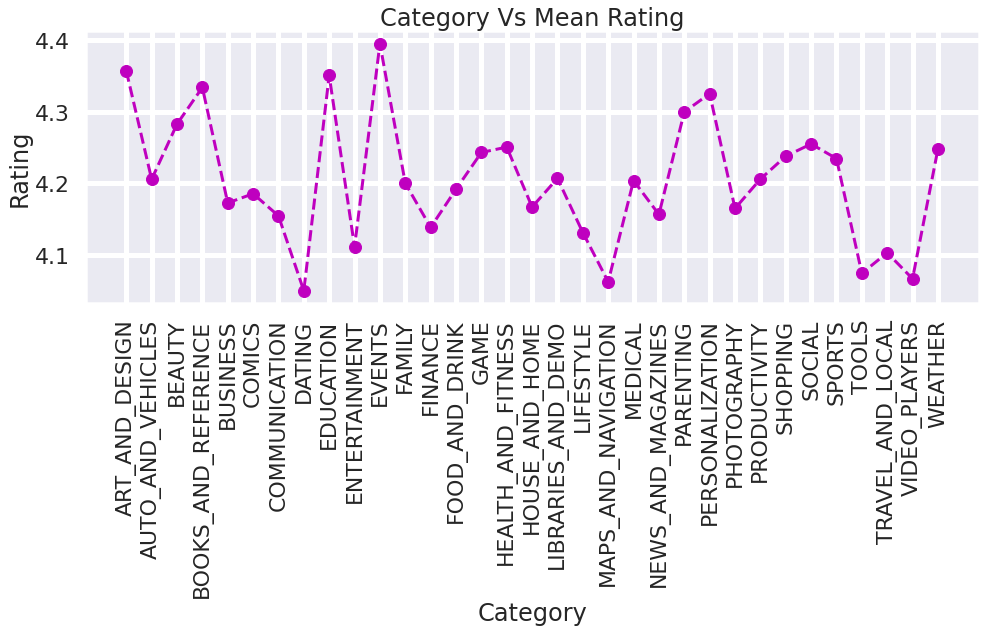

In [529]:
# What is a mean of ratings category wise?
plt.figure(figsize=(16,5))
plt.plot(x, marker='o', color = 'm', linestyle='dashed', markersize=12)
plt.xticks(rotation=90)
plt.title('Category Vs Mean Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

* Mean rating of **Events** category is a highest.
* Mean rating of **Dating** category is a lowest.

* **Categorywise Price Sum** -->

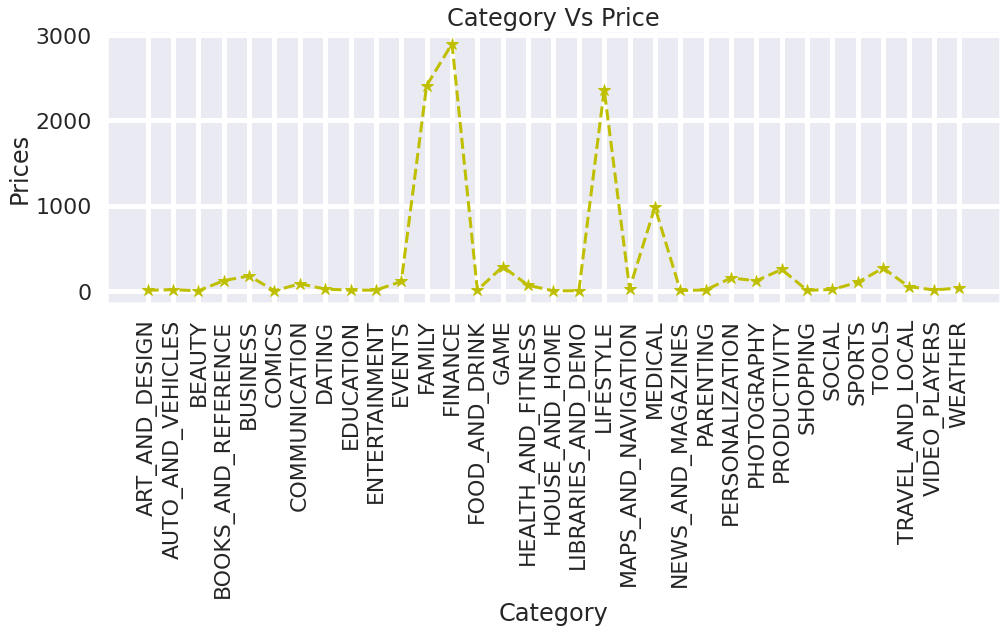

In [530]:
# What is the sum of price category-wise?
plt.figure(figsize=(16,5))
plt.plot(y, marker= '*', color= 'y', linestyle='dashed')
plt.xticks(rotation=90)
plt.title('Category Vs Price')
plt.xlabel('Category')
plt.ylabel('Prices')
plt.show()

* **Reviews Mean By Categorywise** -->

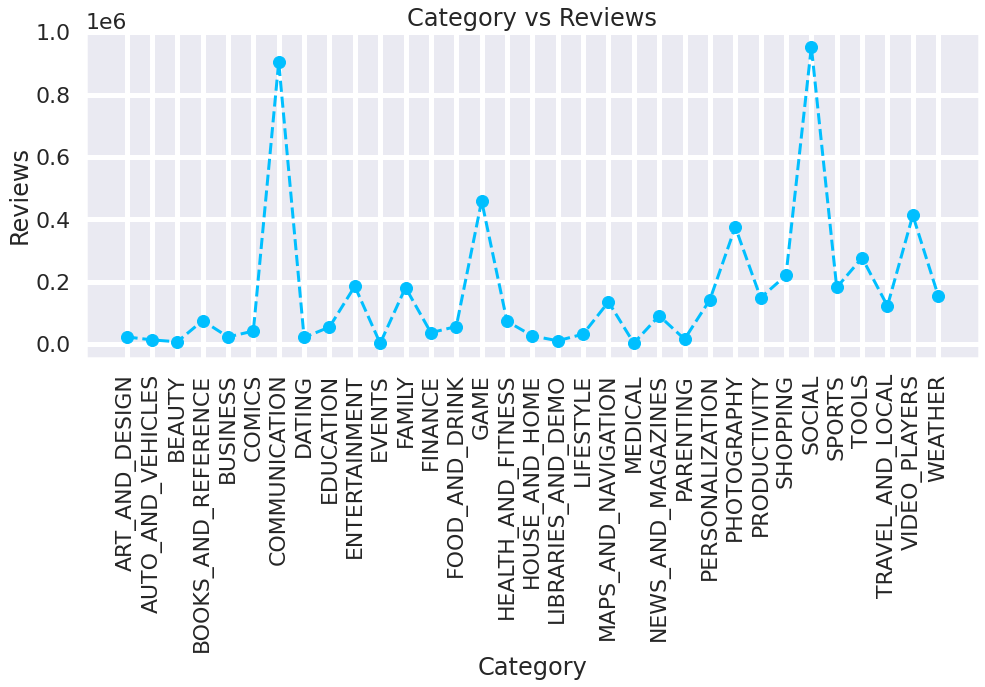

In [531]:
# What is a mean of reviews by category wise?
plt.figure(figsize=(16,6))
plt.plot(z, marker='o', linestyle='dashed')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

* **Count of Apps in each category** -->

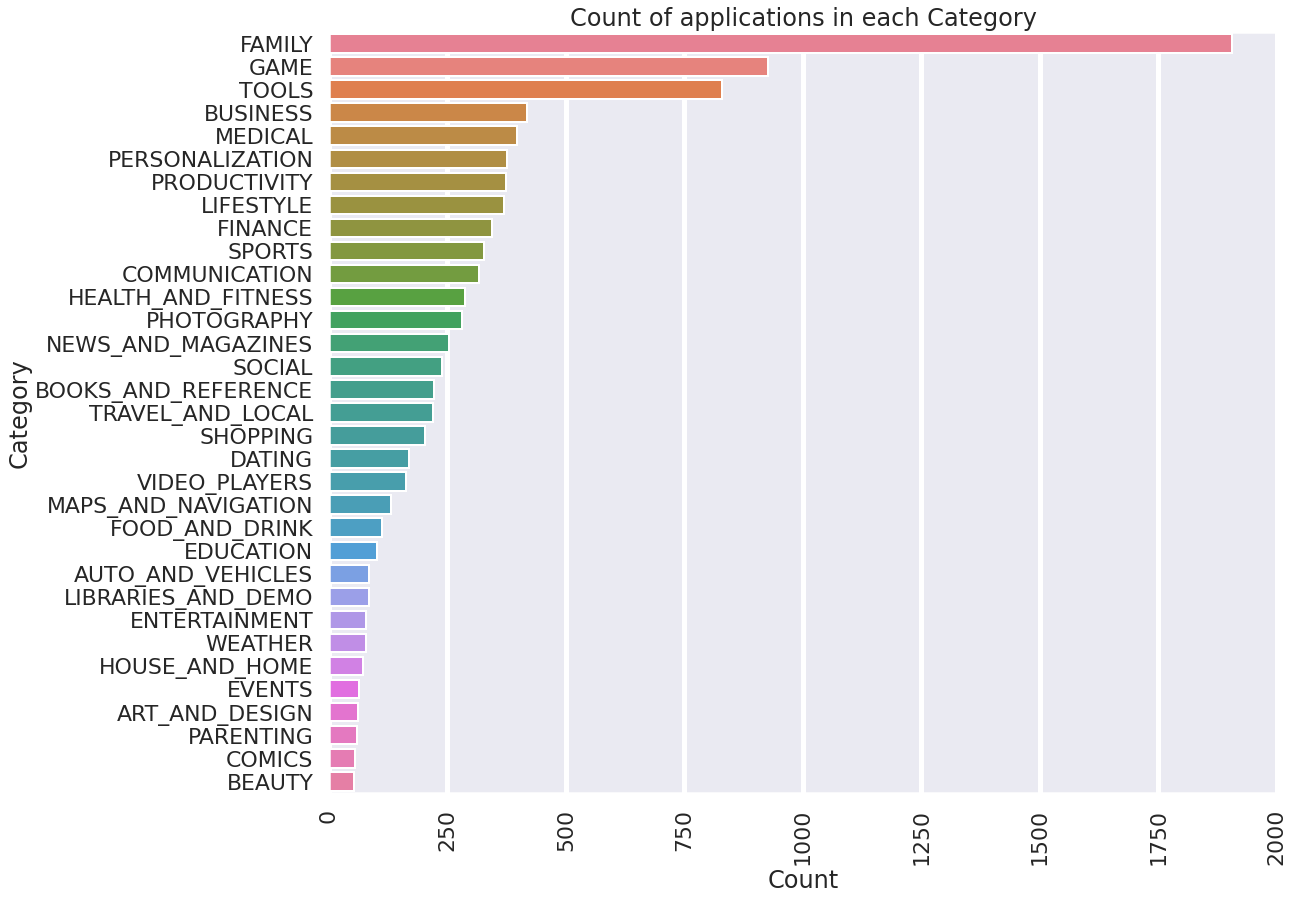

In [532]:
# What is total count of apps in each category?
plt.figure(figsize=(17,14))
plt.xticks(rotation=90)
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Count of applications in each Category");

* **Family** category has highest number of Apps.
* **Beauty** category has least number of Apps.

* **App Distribution By Type** -->

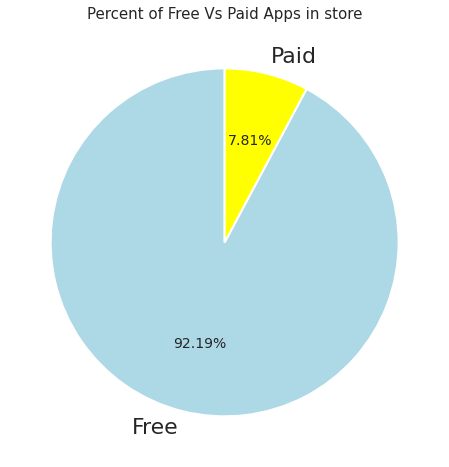

In [533]:
# How much apps are free and paid?
plt.figure(figsize=(8,8))
labels =ps_data_df['Type'].value_counts().index
sizes = ps_data_df['Type'].value_counts(sort = True)
colors = ["lightblue","yellow"]
#explode = [0.2,0]
plt.pie(sizes,labels=labels, colors=colors,startangle=90,autopct="%0.2f%%")
plt.title('Percent of Free Vs Paid Apps in store',size = 15)
plt.show()

* **Content Rating** -->

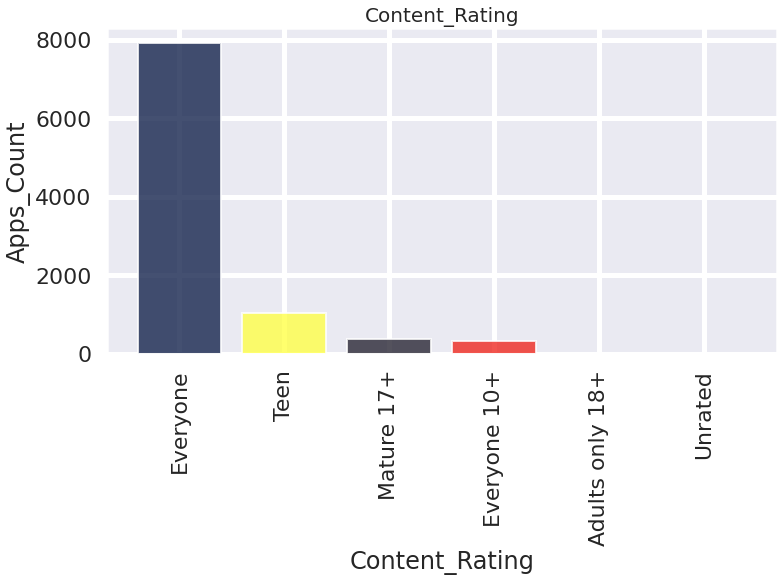

In [534]:
# What content rating apps are avilable on Play store?
x2 = ps_data_df['Content_Rating'].value_counts().index
y2 = ps_data_df['Content_Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])
    
# plotting the graph

plt.figure(figsize=(12,6))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244D','#FFFF48','#292735','#EF2920','#CD202D','#ECC5F2'], alpha=0.8)
plt.title('Content_Rating',size = 20)
plt.xticks(rotation=90)
plt.ylabel('Apps_Count')
plt.xlabel('Content_Rating')
plt.show()

* **81%** of Application are built for **Everyone**.

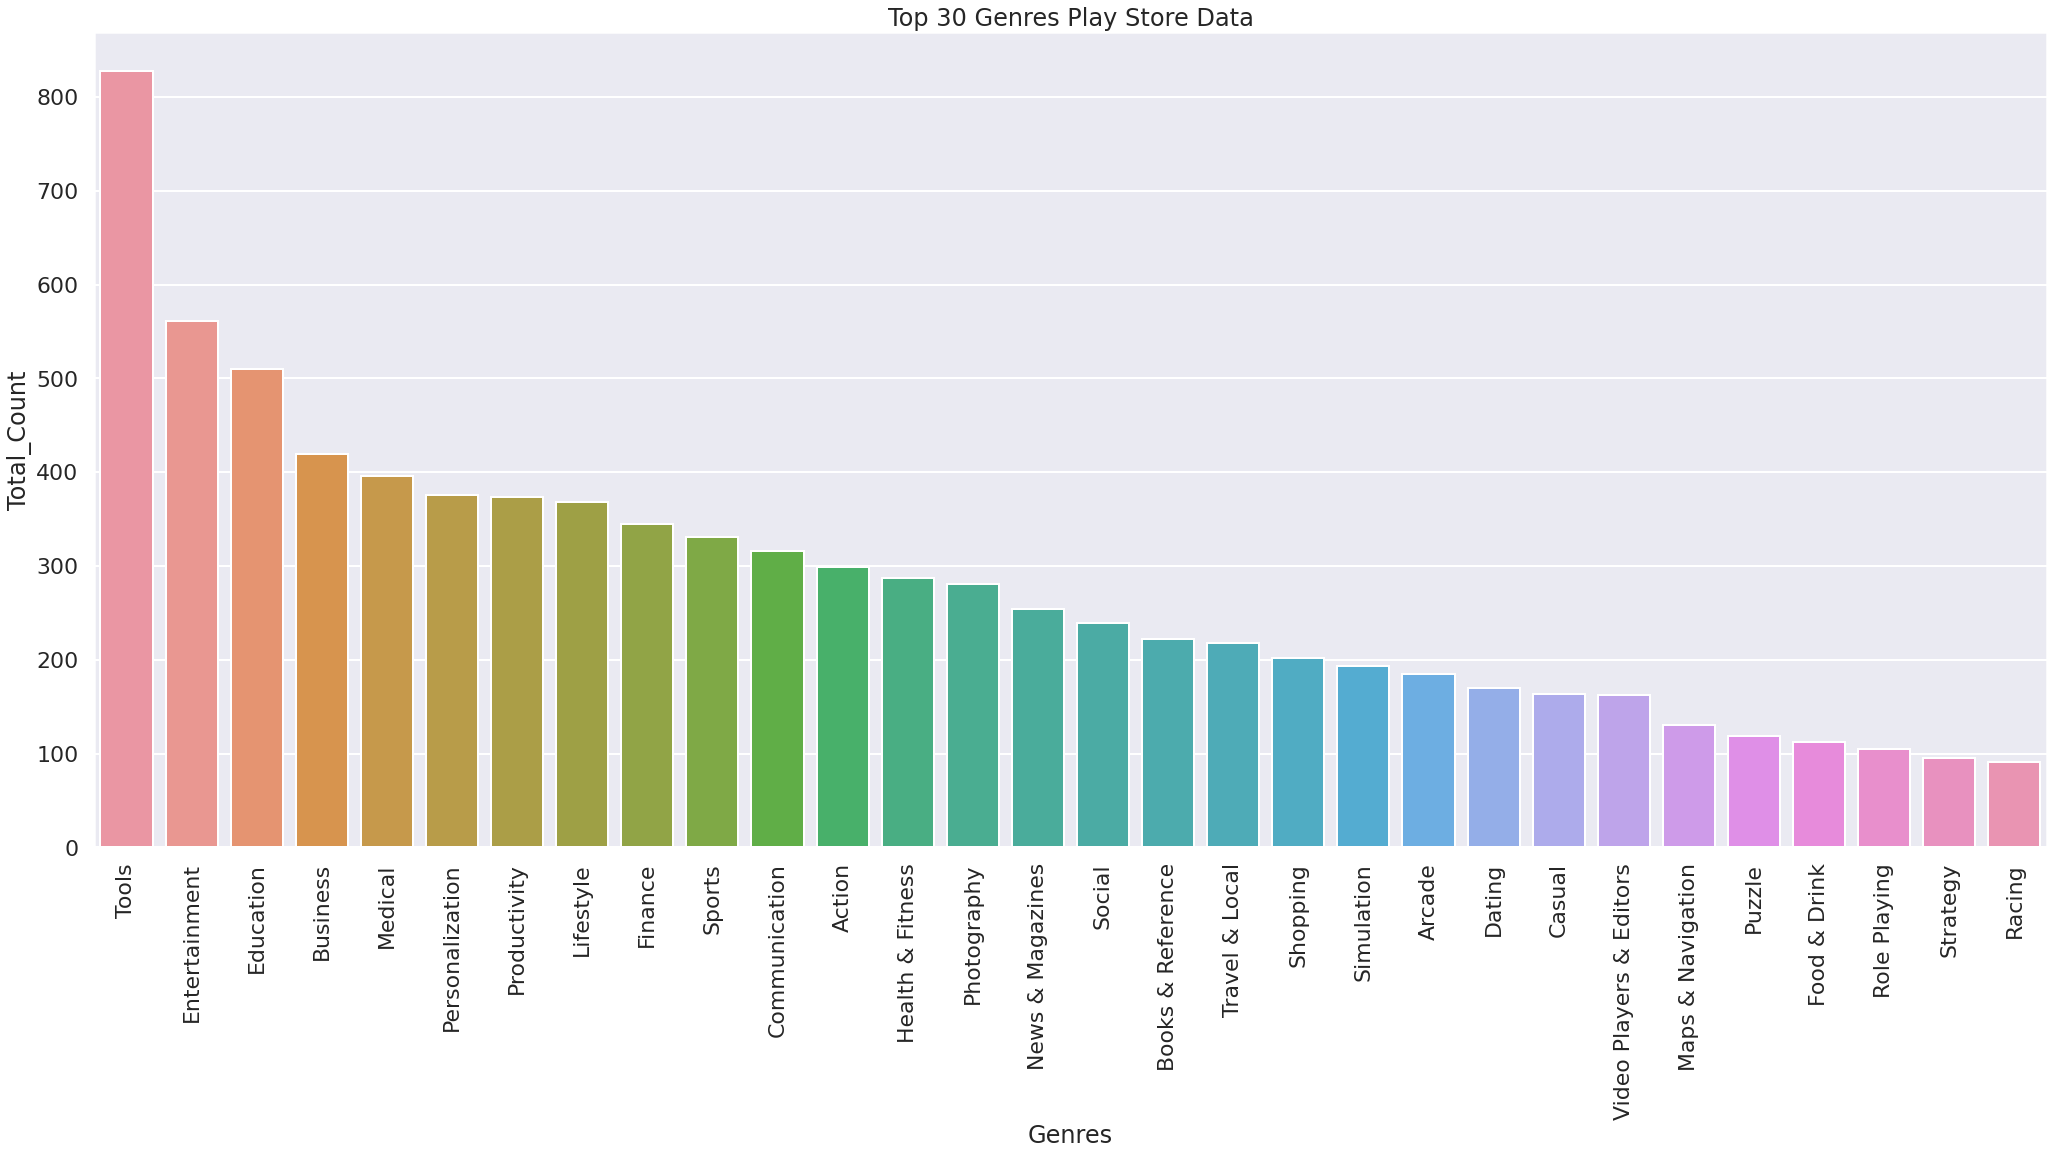

In [535]:
plt.rcParams['figure.figsize'] = [35, 15]
sns.set_context('poster')
# sns.set_palette(sns.color_palette(colors))
sns.barplot(x='Genres', y='Total_Count', data= geners_df)
plt.xticks(rotation=90)
plt.title("Top 30 Genres Play Store Data")
plt.show()

* **Size, Rating, Price and Reviews Viz** -->

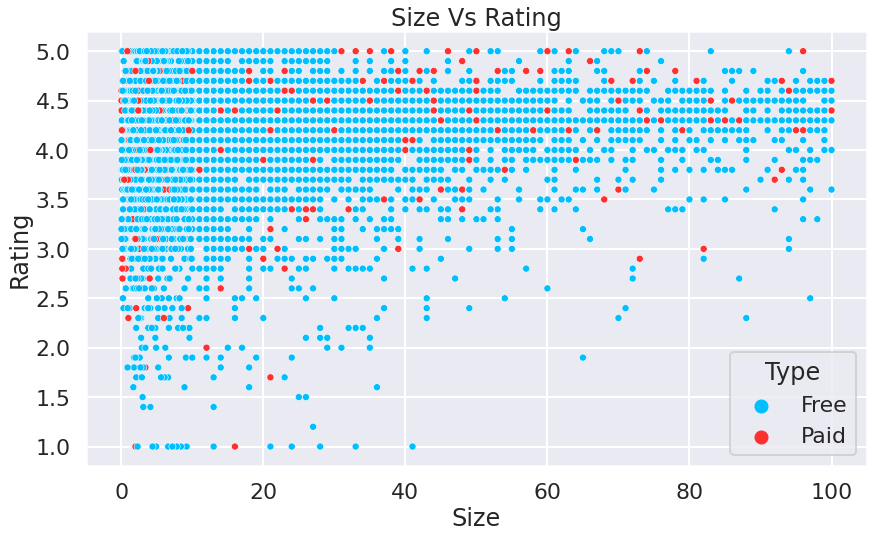

In [536]:
# What is the effect of apps size on Rating?
plt.figure(figsize=(14,8))
sns.set_context('poster')
sns.scatterplot(x = ps_data_df['Size'], y = ps_data_df['Rating'], hue=ps_data_df['Type'], s= 50)
plt.title("Size Vs Rating")
plt.show()

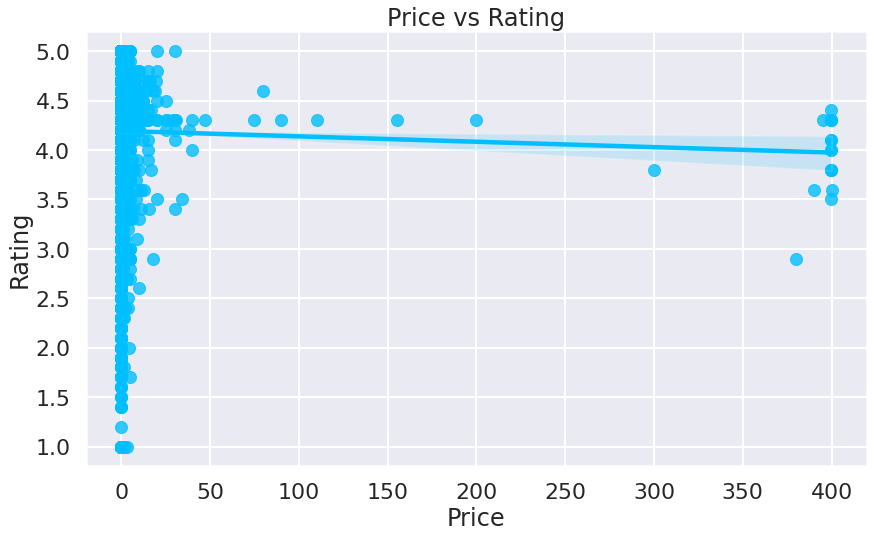

In [537]:
# What is the relation between price and rating?
fig,ax= plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.regplot(x="Price",y="Rating", data=ps_data_df)
plt.title("Price vs Rating")
plt.show()

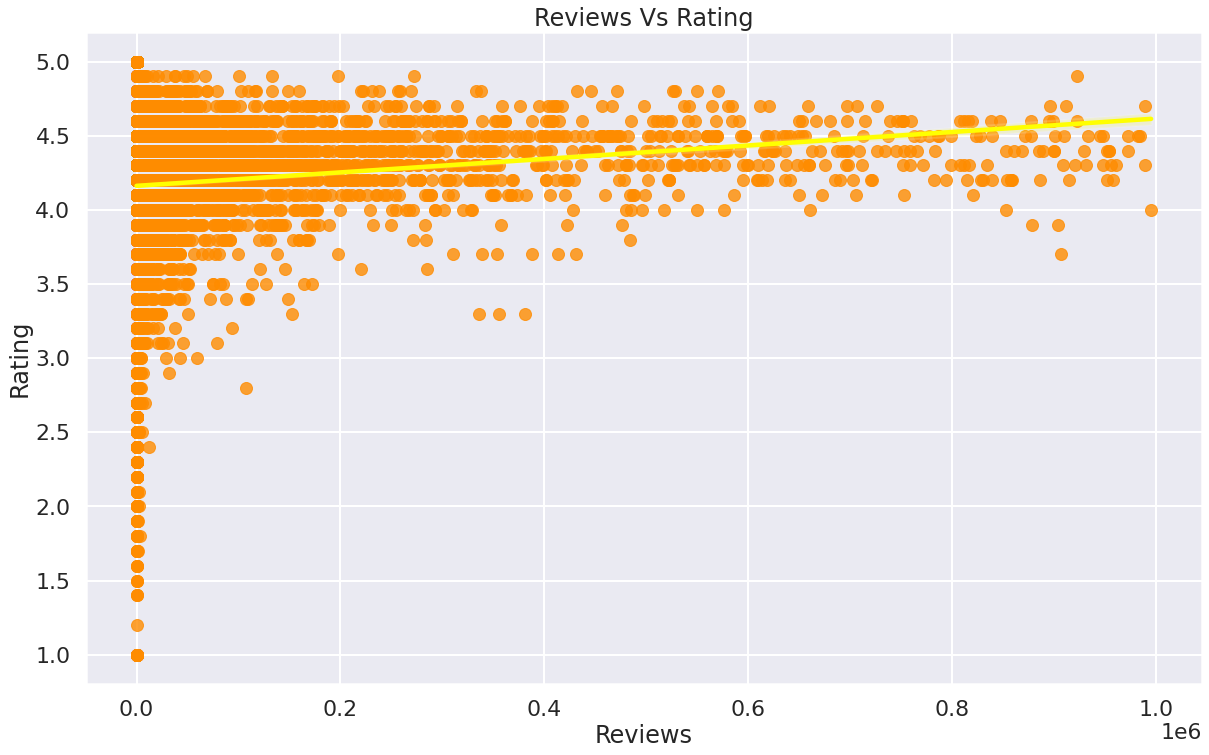

In [538]:
plt.figure(figsize = (20,12))
sns.set_context('poster')
sns.regplot(x="Reviews", y="Rating", scatter_kws={"color": "darkorange"}, line_kws={"color": "yellow"}, data=ps_data_df[ps_data_df['Reviews']<1000000]);
plt.title('Reviews Vs Rating')
plt.show()

* **Overall Sentiment Count** -->

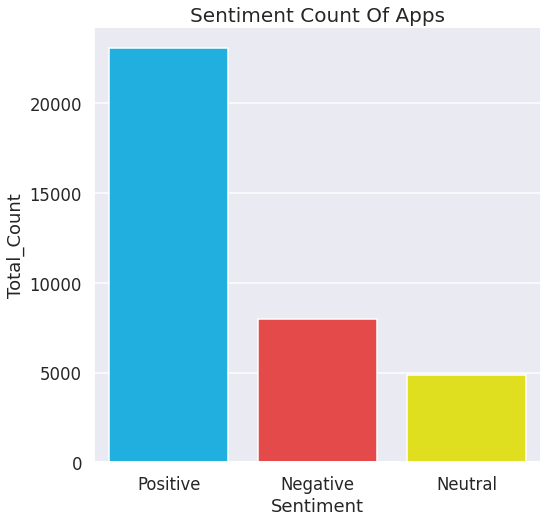

In [539]:
# What is a overall sentiment count of apps?
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_context('talk')
colors = ["#00BFFF", "#FF3030", "#FFFF00"]
sns.set_palette(sns.color_palette(colors))
# sns.set_style('white')
sns.barplot(x="Sentiment", y="Total_Count", data= sentiment_count_df)
plt.title('Sentiment Count Of Apps',size = 20)
plt.show()

* **Sentiment Polarity Distribution** 
***App Type: Paid** -->

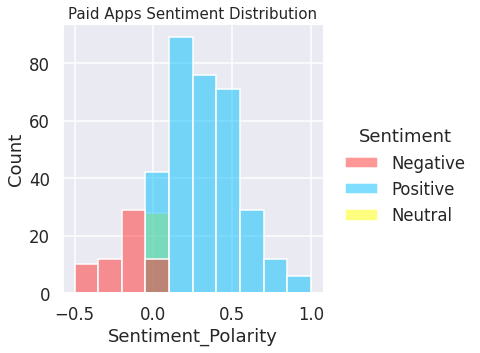

In [540]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set_context('talk')
# sns.set_style("darkgrid")
colors = ["#FF3030", "#00BFFF","#FFFF00"]
sns.set_palette(sns.color_palette(colors))
sns.displot(app_type_paid_df, x="Sentiment_Polarity", hue= 'Sentiment', bins=10)
plt.title('Paid Apps Sentiment Distribution',size = 15)
plt.show()

* **Sentiment Polarity Distribution**
***App Type: Free** -->

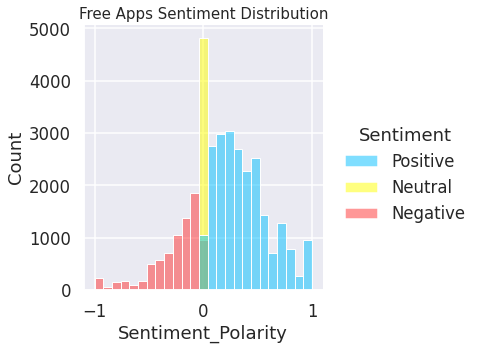

In [541]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_context('talk')
sns.set_style("darkgrid")
colors = ["#00BFFF","#FFFF00", "#FF3030"]
sns.set_palette(sns.color_palette(colors))
sns.displot(app_type_free_df, x="Sentiment_Polarity", hue= 'Sentiment', bins=25)
plt.title('Free Apps Sentiment Distribution',size = 15)
plt.show()

* **Seniment Count Categorywise** -->

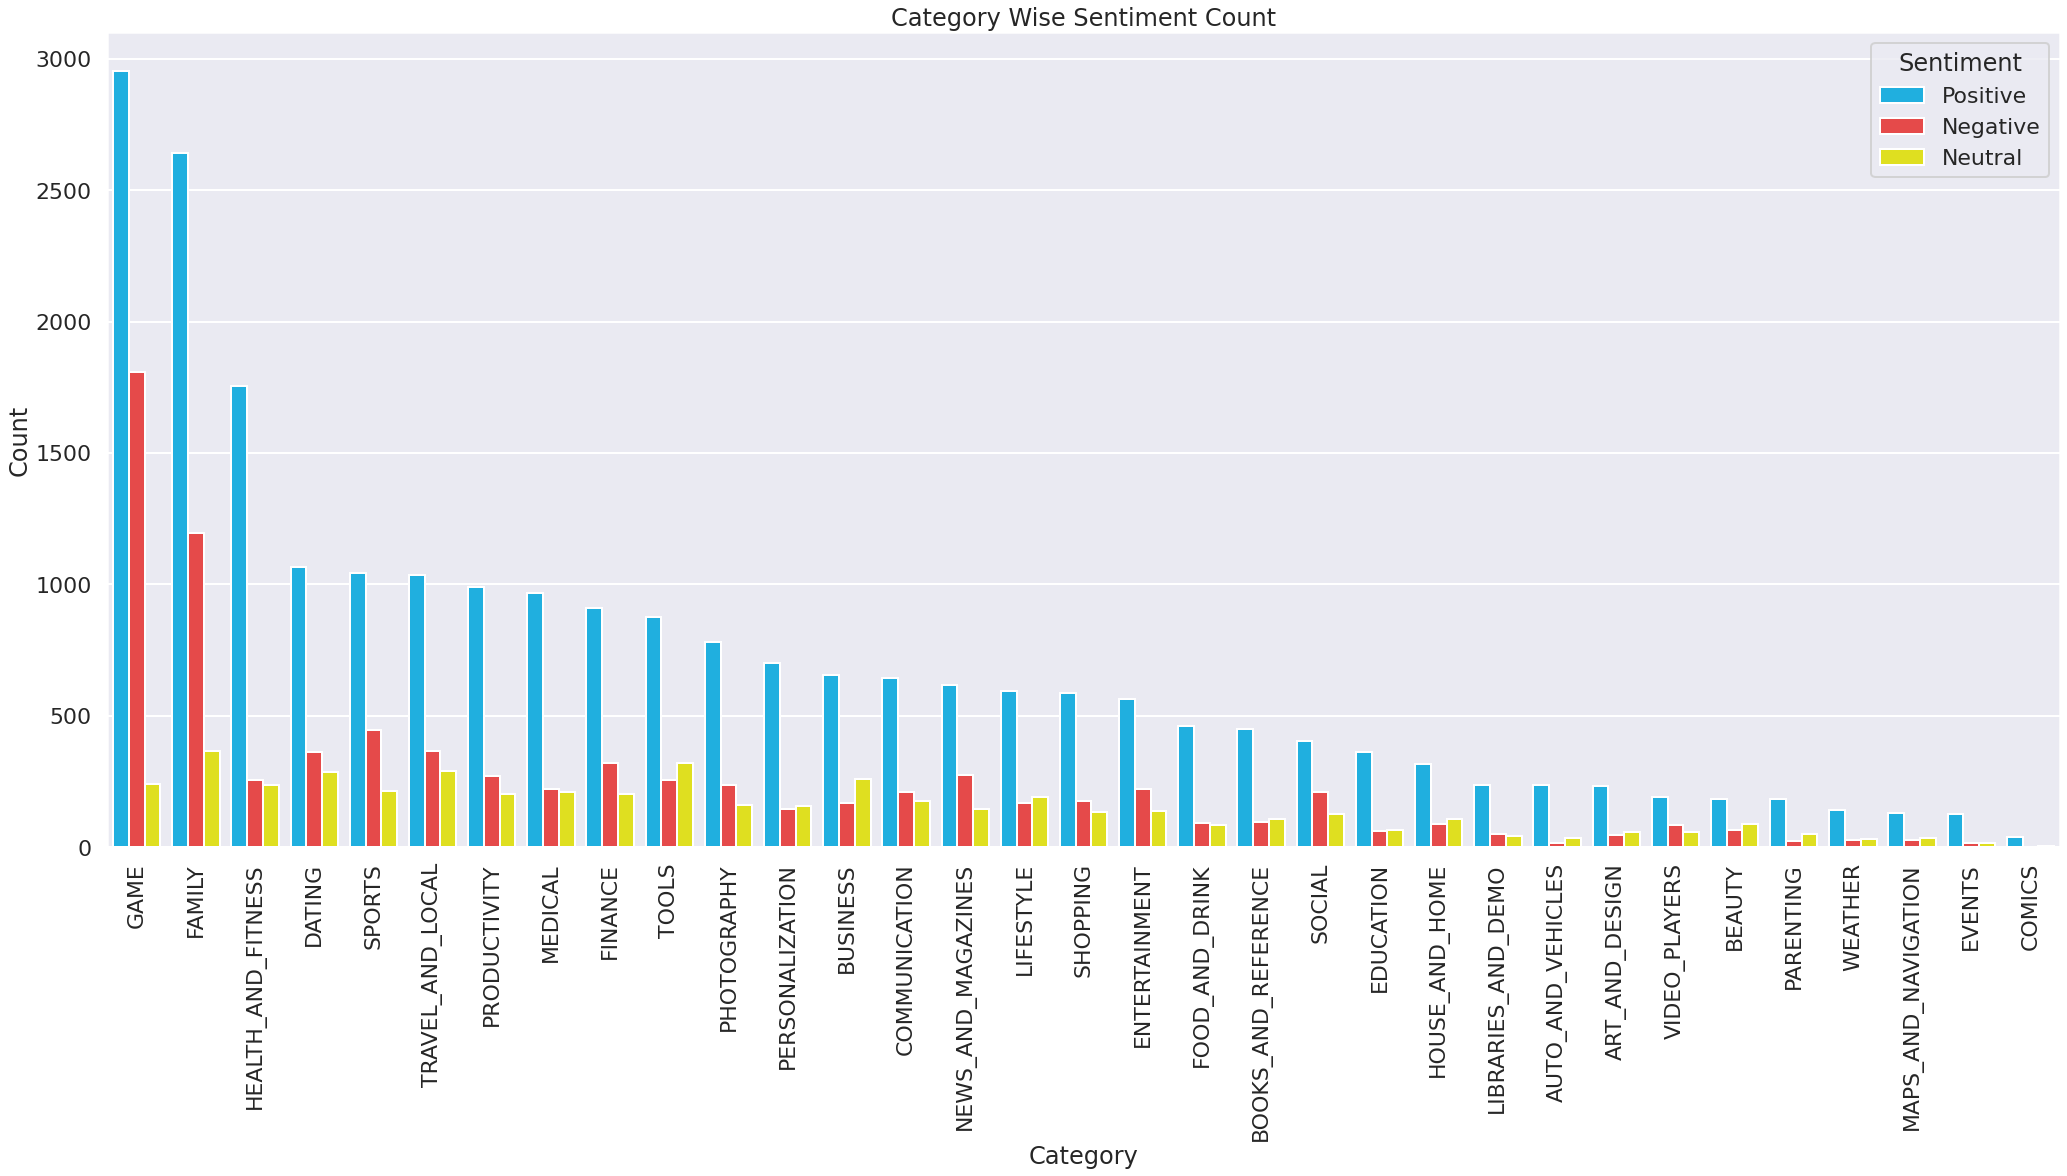

In [542]:
# What is a Sentiment count of apps by categorywise?
plt.rcParams['figure.figsize'] = [35, 15]
sns.set_context('poster')
colors = ["#00BFFF", "#FF3030", "#FFFF00"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='Category', y='Count', data= sentiment_df, hue='Sentiment')
plt.xticks(rotation=90)
plt.title("Category Wise Sentiment Count")
plt.show()

* **Sentiment Polarity and Rating** -->

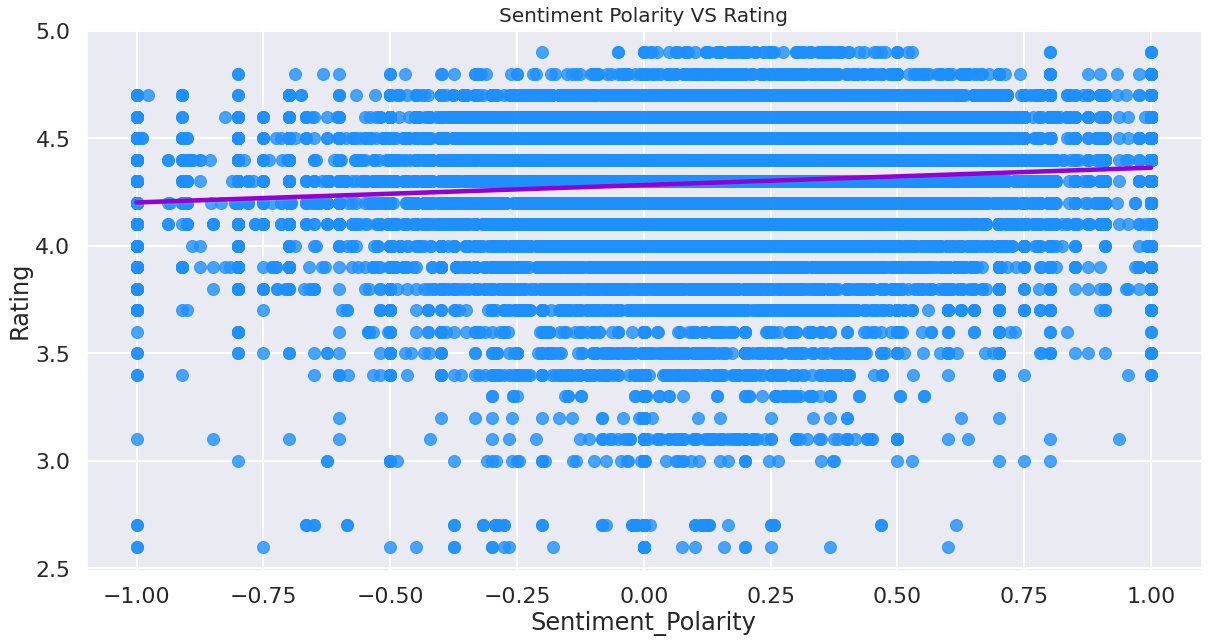

In [543]:
# Is there any relation between Sentimnet Polarity and App ratings?
plt.rcParams['figure.figsize'] = [20, 10]
sns.regplot(y='Rating', x='Sentiment_Polarity', scatter_kws={"color": "dodgerblue"}, line_kws={"color": "darkviolet"}, data=merged_PSUR)
plt.title('Sentiment Polarity VS Rating', size =20)
plt.show()

* **Top 10 Apps with Positive sentiment count** -->

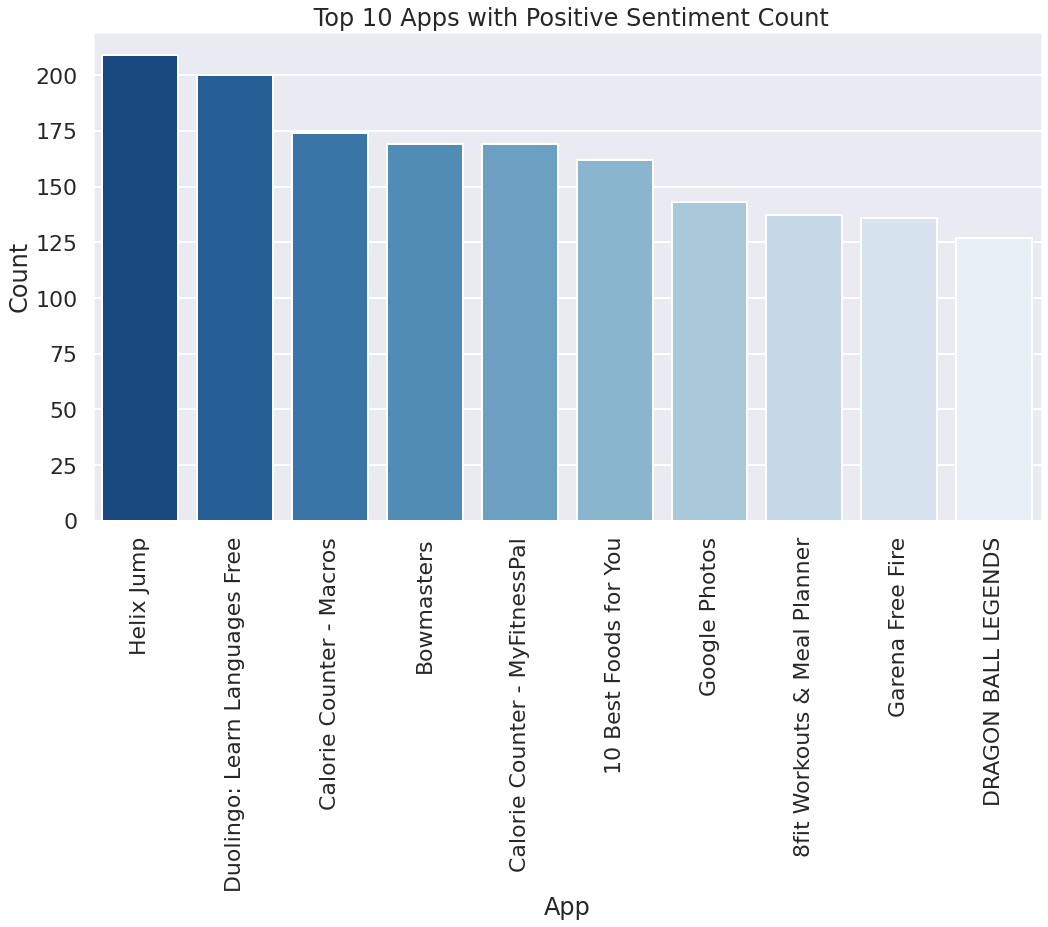

In [544]:
# Which top 10 apps has positive sentiments?
plt.rcParams['figure.figsize'] = [17, 9]
sns.set_context('poster')
sns.barplot(x='App', y='Count', data= tempdf, palette= "Blues_r")
plt.xticks(rotation=90)
plt.title(" Top 10 Apps with Positive Sentiment Count")
plt.show()

* **Top 10 Apps with Negative Sentiment Count** -->

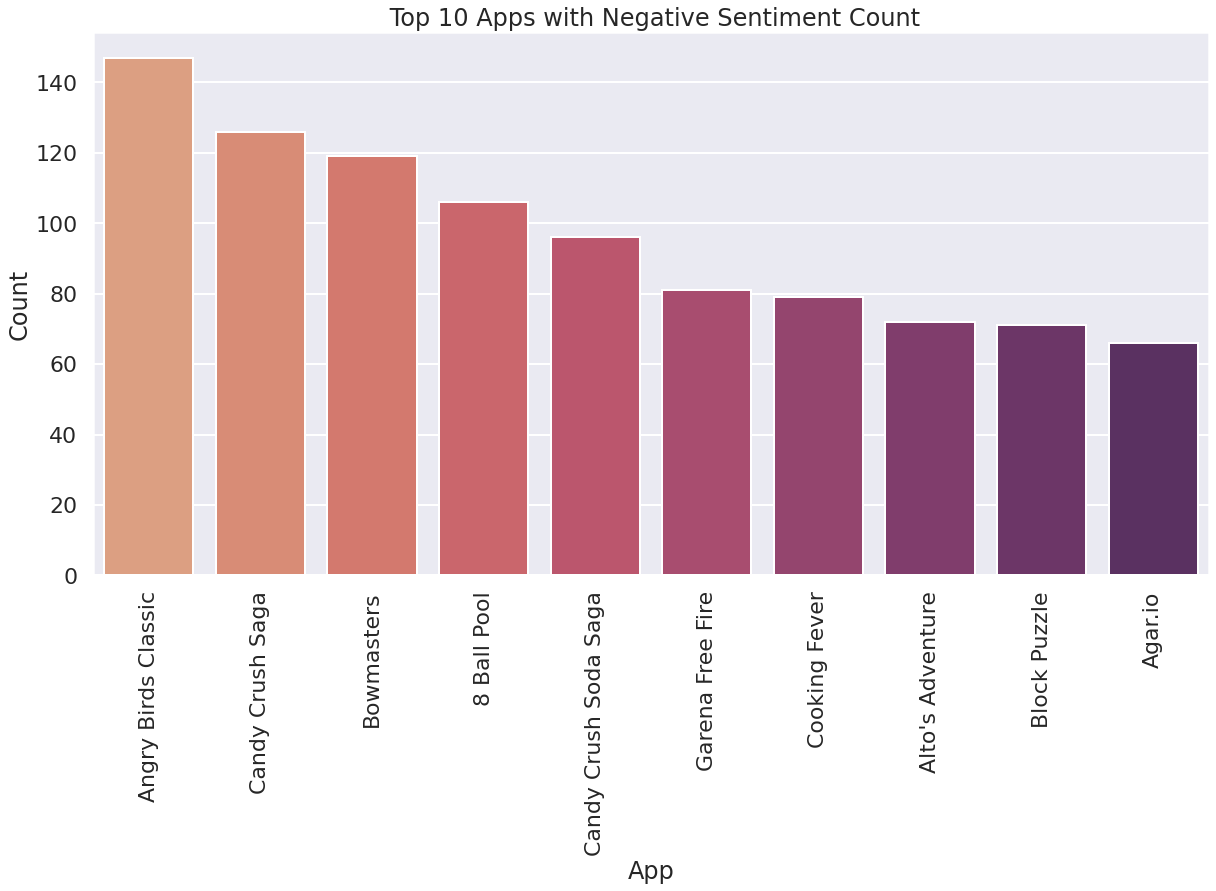

In [545]:
# Which top 10 apps has negative sentiments?
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_context('poster')
sns.barplot(x='App', y='Count', data= tempdfnegative, palette = "flare")
plt.xticks(rotation=90)
plt.title(" Top 10 Apps with Negative Sentiment Count")
plt.show()

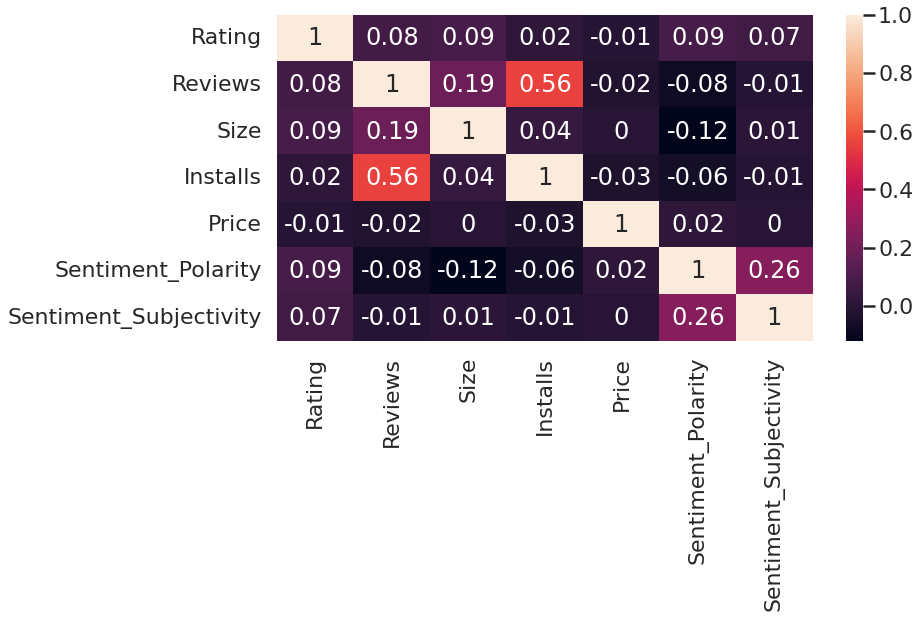

In [546]:
# Corealtion of Merged Dataset
plt.rcParams['figure.figsize'] = [12, 6]
corr = merged_PSUR.corr().round(2)
hm = sns.heatmap(corr, annot = True)
plt.savefig('hm.png', bbox_inches='tight')
plt.show()

# **Conclusion:**
* **92.19%** apps are **Free** and **7.81%** apps are **paid** in type.
* **81.10%** apps has **Everyone** content rating.
* **Events** category has a highest mean rating of **4.39** and **Dating** category has lowest **4.05** rating.
* **Family**, **Game** and **Tools** are top three categories having **1906, 926** and **829** app count.
* Tools, Entertainment, Education, Buisness and Medical are top Genres.
* **8783** Apps are having size less than **50 MB**.
* **7749** Apps are having rating more than **4.0** including both type of apps.
* Overall sentiment count of merged dataset in which **Positive** sentiment count is **64%,** **Negative 22%** and **Neutral 13%**.

###**Summary:** 90% numbers of Apps are Free in type, its a important factor for app success. Content rating is also important factor for app developement as most of the apps are for Everyone category. There is some realation between reviews and installs column. So, we can assume that postive reviews might help for Apps installs